In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('fivethirtyeight')
%matplotlib inline

## Sums of Independent Variables ##

After the dry, algebraic discussion of the previous section it is a relief to finally be able to compute some variances.

In [2]:
# VIDEO: Variance of a Sum

from IPython.display import YouTubeVideo

YouTubeVideo('M3Y_oBn2o7Y')

### The Variance of a Sum ###

Let $X_1, X_2, \ldots X_n$ be random variables with sum

$$
S_n = \sum_{i=1}^n X_i
$$

The variance of the sum is

$$
\begin{align*}
Var(S_n) &= Cov(S_n, S_n) \\
&= \sum_{i=1}^n\sum_{j=1}^n Cov(X_i, X_j) ~~~~ \text{(bilinearity)} \\
&= \sum_{i=1}^n Var(X_i) + \mathop{\sum \sum}_{1 \le i \ne j \le n} Cov(X_i, X_j)
\end{align*}
$$

We say that *the variance of the sum is the sum of all the variances and all the covariances*.

- The first sum has $n$ terms.
- The second sum has $n(n-1)$ terms.

Since $Cov(X_i, X_j) = Cov(X_j, X_i)$, the second sum can be written as $2\mathop{\sum \sum}_{1 \le i < j \le n} Cov(X_i, X_j)$. But we will use the form given above.

### Sum of Independent Random Variables ###

If $X_1, X_2 \ldots , X_n$ are independent, then all the covariance terms in the formula above are 0. 

Therefore if $X_1, X_2, \ldots, X_n$ are independent, then

$$
Var(S_n) = \sum_{i=1}^n Var(X_i)
$$

Thus for independent random variables $X_1, X_2, \ldots, X_n$, both the expectation and the variance add up nicely:

$$
E(S_n) = \sum_{i=1}^n E(X_i), ~~~~~~ Var(S_n) = \sum_{i=1}^n Var(X_i)
$$

When the random variables are i.i.d., this simplifies even further.

In [3]:
# VIDEO: Variance of IID Sample Sum

YouTubeVideo('jHcdiO5N0ng')

### Sum of an IID Sample ###
Let $X_1, X_2, \ldots, X_n$ be i.i.d., each with mean $\mu$ and $SD$ $\sigma$. You can think of $X_1, X_2, \ldots, X_n$ as draws at random with replacement from a population, or the results of independent replications of the same experiment.

Let $S_n$ be the sample sum, as above. Then

$$
E(S_n) = n\mu ~~~~~~~~~~ Var(S_n) = n\sigma^2 ~~~~~~~~~~ SD(S_n) = \sqrt{n}\sigma
$$

This implies that as the sample size $n$ increases, the distribution of the sum $S_n$ shifts to the right and is more spread out. The expectation goes up linearly in $n$, but the SD goes up more slowly.

```{admonition} Quick Check
Suppose the sizes of $100$ random households are i.i.d. with expectation $2.5$ and SD $1.9$. Let $S$ be the total number of people in all $100$ households, that is, the sum of all the household sizes.

(a) Pick one of the following values for $E(S)$: $25$, $250$, $2500$

(b) Pick one of the following values for $SD(S)$: $19$, $190$, $1900$


```

```{admonition} Answer
:class: dropdown
(a) $250$

(b) $19$

```

Here is an important application of the formula for the variance of an i.i.d. sample sum.

### Variance of the Binomial ###
Let $X$ have the binomial $(n, p)$ distribution. We know that 

$$
X = \sum_{j=1}^n I_j
$$

where $I_1, I_2, \ldots, I_n$ are i.i.d. indicators, each taking the value 1 with probability $p$. Each of these indicators has expectation $p$ and variance $pq = p(1-p)$. Therefore

$$
E(X) = np ~~~~~~~~~~ Var(X) = npq ~~~~~~~~~~ SD(X) = \sqrt{npq}
$$

For example, if $X$ is the number of heads in 100 tosses of a coin, then

$$
E(X) = 100 \times 0.5 = 50 ~~~~~~~~~~ SD(X) = \sqrt{100 \times 0.5 \times 0.5} = 5
$$

Here is the distribution of $X$. You can see that there is almost no probability outside the range $E(X) \pm 3SD(X)$.

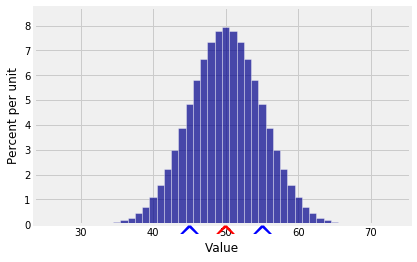

In [4]:
k = np.arange(25, 75, 1)
binom_probs = stats.binom.pmf(k, 100, 0.5)
binom_dist = Table().values(k).probabilities(binom_probs)
Plot(binom_dist, show_ev=True, show_sd=True)

```{admonition} Quick Check
A die is rolled $45$ times. Find the expectation and standard deviation of the number of times the face with six spots appears.

```

```{admonition} Answer
:class: dropdown
Expectation $7.5$, SD $2.5$

```

In [5]:
# VIDEO: Binomial and Poisson Variance

YouTubeVideo('KoWHPWJBeJo')

### Variance of the Poisson, Revisited ###

We showed earlier that if $X$ has the Poisson $(\mu)$ distribution then $E(X) = \mu$, $Var(X) = \mu$, and $SD(X) = \sqrt{\mu}$. Now we have a way to understand the formula for the SD.

One way in which a Poisson $(\mu)$ distribution can arise is as an approximation to a binomial $(n, p)$ distribution where $n$ is large, $p$ is small, and $np = \mu$. The expectation of the binomial becomes the parameter of the approximating Poisson distribution, which is also the expectation of the Poisson.

Now let's compare the standard deviations. The standard deviation of the binomial is

$$
\sqrt{npq} ~ \approx ~ \sqrt{np} ~~~ \text{ because the small } p \text{ implies } q \approx 1
$$

But $np = \mu$ in this setting, so the SD of the binomial is approximately $\sqrt{\mu}$. That's the SD of its approximating Poisson $(\mu)$ distribution.